## Classification Task (Binary)

In [1]:
#Perform necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
df['Saving accounts'] = df['Saving accounts'].map({np.nan:0, 'little':1, 'moderate':2, 'quite rich':3, 'rich':4})

In [5]:
df['Checking account'] = df['Checking account'].map({np.nan:0, 'little':1, 'moderate':2, 'rich':3})

In [6]:
df['Sex'] = df['Sex'].factorize()[0]

In [7]:
df.describe(include='object').T

,count,unique,top,freq
Housing,1000,3,own,713
Purpose,1000,8,car,337
Risk,1000,2,good,700


In [8]:
housing = pd.get_dummies(df['Housing'], drop_first=True, prefix='house', prefix_sep='_')
purpose = pd.get_dummies(df['Purpose'], drop_first=True, prefix='purpose', prefix_sep='_')

In [9]:
df = pd.concat([df, housing, purpose], axis=1).drop(['Purpose', 'Housing'], axis=1)

In [10]:
df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,house_own,house_rent,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,0,2,0,1,1169,6,good,1,0,0,0,0,0,1,0,0
1,22,1,2,1,2,5951,48,bad,1,0,0,0,0,0,1,0,0
2,49,0,1,1,0,2096,12,good,1,0,0,0,1,0,0,0,0
3,45,0,2,1,1,7882,42,good,0,0,0,0,0,1,0,0,0
4,53,0,2,1,1,4870,24,bad,0,0,1,0,0,0,0,0,0


In [11]:
df.isna().sum()

Age                            0
Sex                            0
Job                            0
Saving accounts                0
Checking account               0
Credit amount                  0
Duration                       0
Risk                           0
house_own                      0
house_rent                     0
purpose_car                    0
purpose_domestic appliances    0
purpose_education              0
purpose_furniture/equipment    0
purpose_radio/TV               0
purpose_repairs                0
purpose_vacation/others        0
dtype: int64

In [12]:
df['Risk'] = df['Risk'].map({'bad':True, 'good':False})
df['Risk'].value_counts()

False    700
True     300
Name: Risk, dtype: int64

In [13]:
X = df.drop('Risk', axis=1)
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 16), (300, 16), (700,), (300,))

In [14]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.87      0.80       210
        True       0.49      0.30      0.37        90

    accuracy                           0.70       300
   macro avg       0.62      0.58      0.59       300
weighted avg       0.67      0.70      0.67       300



In [17]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred)[::-1,::-1], columns=['Pred True', 'Pred False'], index=['Act True', 'Act False']))

           Pred True  Pred False
Act True          27          63
Act False         28         182


In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
def classification_results(y_test, y_pred):
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}\n')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n') 
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix')
    print(pd.DataFrame(confusion_matrix(y_test, y_pred)[::-1,::-1], columns=['Pred True', 'Pred False'], index=['Act True', 'Act False']))

In [20]:
y_pred = rfc.predict(X_test)
classification_results(y_test, y_pred)

Accuracy Score: 0.7533333333333333

F1 Score: 0.5375

Classification Report
              precision    recall  f1-score   support

       False       0.80      0.87      0.83       210
        True       0.61      0.48      0.54        90

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300

Confusion Matrix
           Pred True  Pred False
Act True          43          47
Act False         27         183


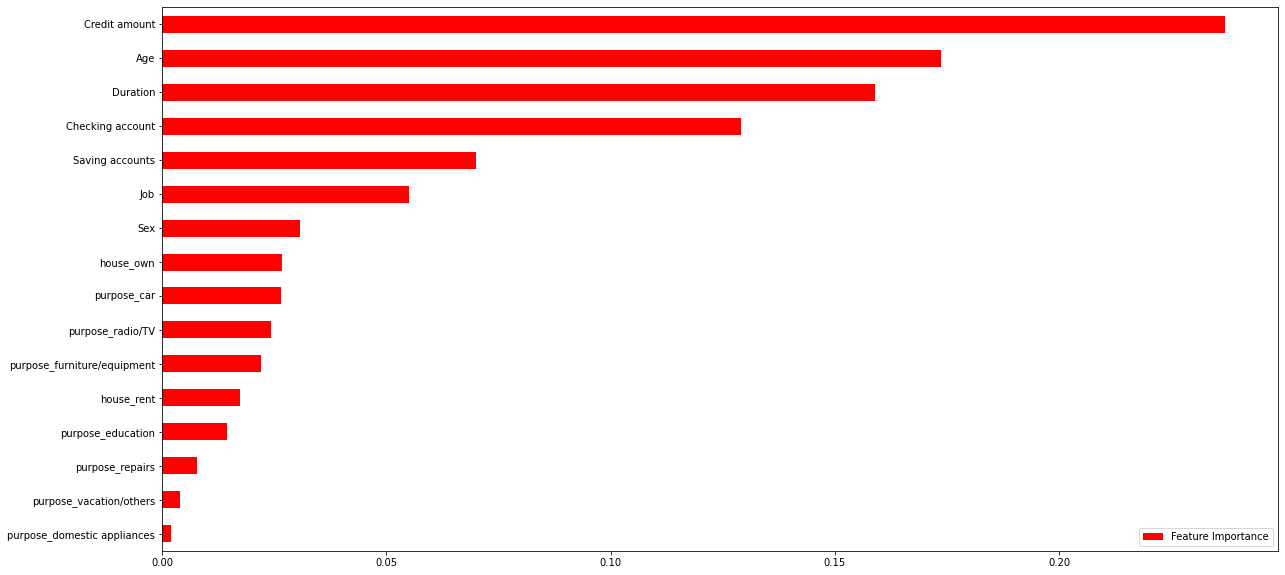

In [21]:
feature_df = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values(by='Feature Importance')
feature_df.plot(kind='barh', color='red', figsize=(20, 10))
plt.show()

In [22]:
df[['Duration', 'Credit amount', 'Age']].corr()

,Duration,Credit amount,Age
Duration,1.000000,0.624984,-0.036136
Credit amount,0.624984,1.000000,0.032716
Age,-0.036136,0.032716,1.000000


In [23]:
df.columns

Index(['Age', 'Sex', 'Job', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Risk', 'house_own', 'house_rent',
       'purpose_car', 'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/TV', 'purpose_repairs',
       'purpose_vacation/others'],
      dtype='object')

In [24]:
df['Risk']

0      False
1       True
2      False
3      False
4       True
       ...  
995    False
996    False
997    False
998     True
999    False
Name: Risk, Length: 1000, dtype: bool

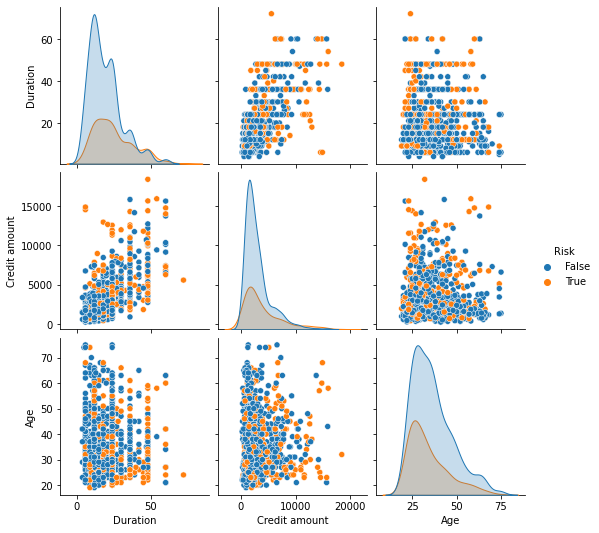

In [25]:
sns.pairplot(data = df[['Duration', 'Credit amount', 'Age', 'Risk']], hue='Risk')

## SMOTE for class imbalance

In [26]:
print(f'Before SMOTE: Train Dataset Size: {len(y)} - Class Distributions:\n{y_train.value_counts()}')
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train.values, y_train.values)
X_train = pd.DataFrame(X_smote, columns=X_train.columns)
y_train = pd.Series(y_smote)
print(f'After SMOTE: Train Dataset Size: {len(y)} - Class Distributions:\n{y_train.value_counts()}')

Before SMOTE: Train Dataset Size: 1000 - Class Distributions:
False    490
True     210
Name: Risk, dtype: int64
After SMOTE: Train Dataset Size: 1000 - Class Distributions:
True     490
False    490
dtype: int64


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.61      0.70       210
        True       0.43      0.67      0.52        90

    accuracy                           0.63       300
   macro avg       0.62      0.64      0.61       300
weighted avg       0.70      0.63      0.65       300



In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rfc.predict(X_test)
classification_results(y_test, y_pred)

Accuracy Score: 0.74

F1 Score: 0.5666666666666667

Classification Report
              precision    recall  f1-score   support

       False       0.81      0.81      0.81       210
        True       0.57      0.57      0.57        90

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300

Confusion Matrix
           Pred True  Pred False
Act True          51          39
Act False         39         171


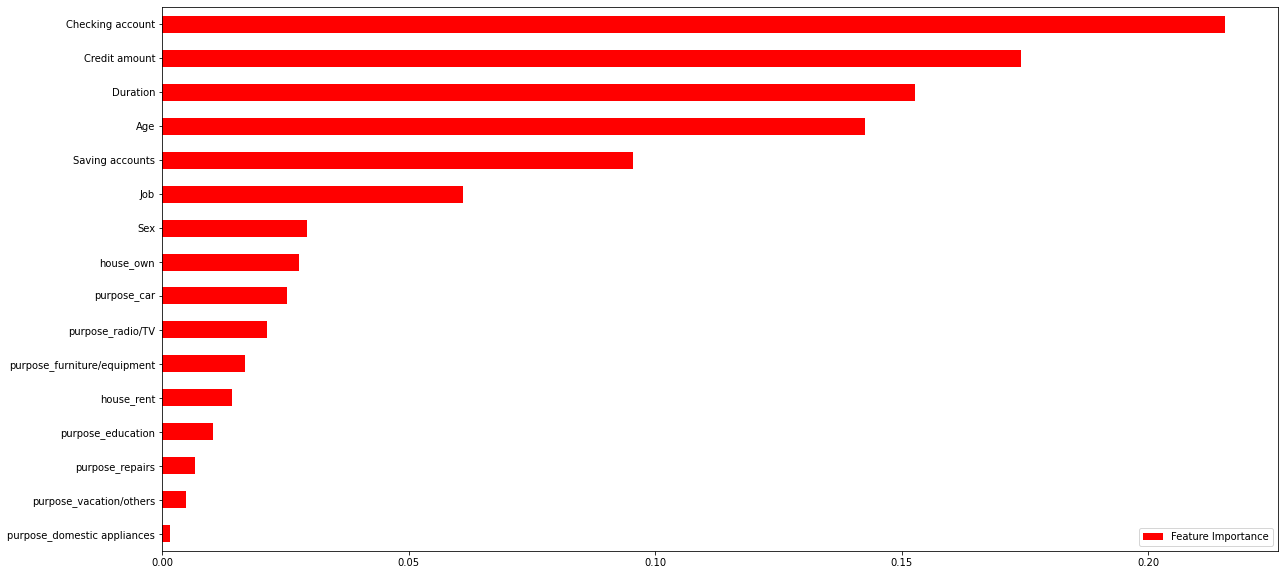

In [31]:
feature_df = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values(by='Feature Importance')
feature_df.plot(kind='barh', color='red', figsize=(20, 10))
plt.show()

In [34]:
df['Checking account']

0      1
1      2
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    1
999    2
Name: Checking account, Length: 1000, dtype: int64

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [36]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [37]:
y_pred = rfc.predict(X_test)
classification_results(y_test, y_pred)

Accuracy Score: 0.7266666666666667

F1 Score: 0.5340909090909091

Classification Report
              precision    recall  f1-score   support

       False       0.80      0.81      0.81       210
        True       0.55      0.52      0.53        90

    accuracy                           0.73       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.72      0.73      0.72       300

Confusion Matrix
           Pred True  Pred False
Act True          47          43
Act False         39         171
